# Unsupervised Learning –Clustering
    1) K-means,K-means++
    2) Hierarchical Method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def plot_scatter(X,  color='k', alpha=0.6):
    #if use color index , the index must be between 0 and 1    
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')    


## Genearte sample data and visualiztion

In [14]:
n1=5
n2=5
# cluster 
x1 = np.random.normal(60,10, n1)  # np.random.normal(平均值,標準差,size))
y1 = np.random.normal(5, 0.5,n1)
C1=np.array(list(zip(x1,y1)))#x1 y1
                            # x2 y2
                            # x3 y3 

# cluster 
x2 = np.random.normal(20,10,n2)
y2 = np.random.normal(5,0.5,n2)
C2=np.array(list(zip(x2,y2)))

X_train = np.concatenate((C1,C2))

print(np.mean(C1,axis=0))
print(np.mean(C2,axis=0))

[60.51363422  4.70206228]
[21.80346646  4.88553081]


In [15]:
X_train 

array([[64.05524127,  5.23764591],
       [65.85801253,  4.13958249],
       [70.13251671,  4.16000774],
       [66.62364974,  4.6184343 ],
       [35.89875082,  5.35464096],
       [37.7218014 ,  4.55962711],
       [34.51842184,  4.7653809 ],
       [16.46346894,  4.77418979],
       [ 8.28439665,  5.22555184],
       [12.02924345,  5.10290441]])

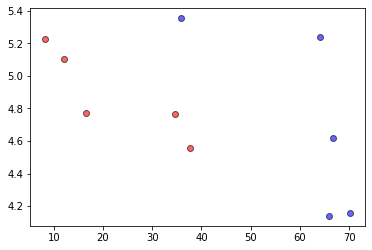

In [34]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

In [17]:
X_train

array([[64.05524127,  5.23764591],
       [65.85801253,  4.13958249],
       [70.13251671,  4.16000774],
       [66.62364974,  4.6184343 ],
       [35.89875082,  5.35464096],
       [37.7218014 ,  4.55962711],
       [34.51842184,  4.7653809 ],
       [16.46346894,  4.77418979],
       [ 8.28439665,  5.22555184],
       [12.02924345,  5.10290441]])

In [18]:
X_train.shape

(10, 2)

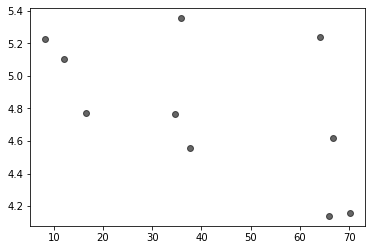

In [19]:
plot_scatter(X_train)
plt.show()

In [20]:
print('mean:',np.mean(X_train,axis=0))
print('std:',np.std(X_train,axis=0))

mean: [41.15855034  4.79379654]
std: [22.90180231  0.41351813]


# K-means algorithm
![](images/kmeans.png)
```    
    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:
    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
```    


In [21]:
kmeans = KMeans(init='random',n_clusters=2).fit(X_train)#開始訓練
kmeans#非監督式學習 沒有答案

KMeans(init='random', n_clusters=2)

In [22]:
kmeans.predict([[80, 0], [100, 3]])#都分在第0群

array([0, 0])

In [23]:
kmeans.predict([[28, 5]])

array([1])

In [24]:
kmeans.predict(X_train)#分出的結果

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [25]:
kmeans.cluster_centers_

array([[66.66735506,  4.53891761],
       [24.15268052,  4.96371583]])

In [26]:
X_train

array([[64.05524127,  5.23764591],
       [65.85801253,  4.13958249],
       [70.13251671,  4.16000774],
       [66.62364974,  4.6184343 ],
       [35.89875082,  5.35464096],
       [37.7218014 ,  4.55962711],
       [34.51842184,  4.7653809 ],
       [16.46346894,  4.77418979],
       [ 8.28439665,  5.22555184],
       [12.02924345,  5.10290441]])

In [27]:
kmeans.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

In [28]:
kmeans.predict(X_train)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

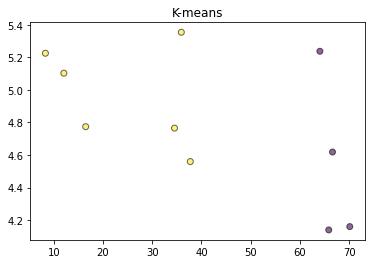

In [29]:
plot_scatter(X_train,kmeans.predict(X_train))
plt.title("K-means")
plt.show()

In [30]:
kmeans.cluster_centers_

array([[66.66735506,  4.53891761],
       [24.15268052,  4.96371583]])

In [31]:
kmeans.cluster_centers_[:,1]

array([4.53891761, 4.96371583])

In [32]:
kmeans.predict(X_train)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

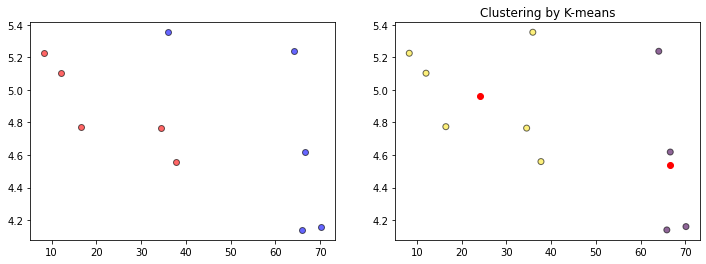

In [35]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.subplot(122)
plot_scatter(X_train,color=kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')#顯示各群的中心點
plt.title("Clustering by K-means")
plt.show()


## Agglomerative algorithm
    1) linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
    
    2.) affinity : string or callable, default: “euclidean”
    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

In [36]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [37]:
acv = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X_train)
acv

AgglomerativeClustering(linkage='single')

In [38]:
cluster_labels=acv.fit_predict(X_train)
cluster_labels

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

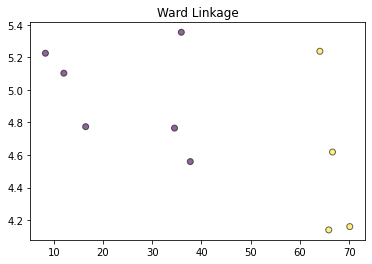

In [39]:
plot_scatter(X_train, acv.fit_predict(X_train))
plt.title("Ward Linkage")
plt.show()

In [40]:
X_train

array([[64.05524127,  5.23764591],
       [65.85801253,  4.13958249],
       [70.13251671,  4.16000774],
       [66.62364974,  4.6184343 ],
       [35.89875082,  5.35464096],
       [37.7218014 ,  4.55962711],
       [34.51842184,  4.7653809 ],
       [16.46346894,  4.77418979],
       [ 8.28439665,  5.22555184],
       [12.02924345,  5.10290441]])

## distance matrix

In [150]:
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_circles,make_blobs
D = np.round(pairwise_distances(X_train),1) 
D

array([[ 0. ,  2.9,  5.4, 20. , 19.8, 41.8, 29.4, 40.6, 29.6, 38.8],
       [ 2.9,  0. ,  8.3, 17. , 22.7, 38.9, 26.4, 37.7, 26.7, 35.9],
       [ 5.4,  8.3,  0. , 25.4, 14.4, 47.2, 34.8, 46. , 35. , 44.2],
       [20. , 17. , 25.4,  0. , 39.8, 21.9,  9.4, 20.6,  9.6, 18.8],
       [19.8, 22.7, 14.4, 39.8,  0. , 61.6, 49.2, 60.4, 49.4, 58.6],
       [41.8, 38.9, 47.2, 21.9, 61.6,  0. , 12.4,  1.3, 12.2,  3. ],
       [29.4, 26.4, 34.8,  9.4, 49.2, 12.4,  0. , 11.2,  0.3,  9.4],
       [40.6, 37.7, 46. , 20.6, 60.4,  1.3, 11.2,  0. , 11. ,  1.9],
       [29.6, 26.7, 35. ,  9.6, 49.4, 12.2,  0.3, 11. ,  0. ,  9.2],
       [38.8, 35.9, 44.2, 18.8, 58.6,  3. ,  9.4,  1.9,  9.2,  0. ]])

In [151]:
D.shape[0]

10

In [152]:
def min_dist(D): #找最小距離
    minimum=10000  
    min_x=0
    min_y=0
    for i in range(D.shape[0]):
        for j in range(i):           
            if D[i][j]<minimum:         
                minimum=D[i][j]
                min_x=i
                min_y=j
                #print(i,j,D[i][j])
                
    return (min_x,min_y),minimum

In [153]:
min_dist(D)#第8個點跟第6個點的距離最小 是0.3

((8, 6), 0.3)

## plot dendrogram (樹狀圖)

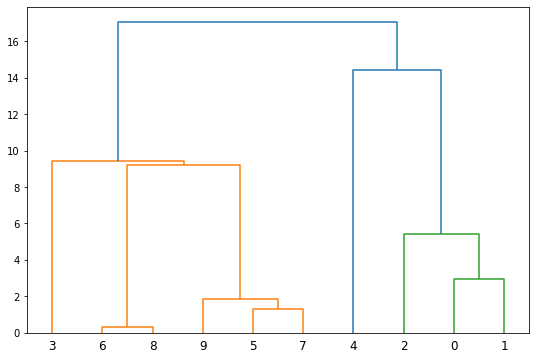

In [154]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))

def plot_dendrogram(x, method='ward'):
    Z = linkage(x, method)
    dendrogram(Z)

plot_dendrogram(X_train,'single')
plt.show()

## Comparing different hierarchical linkage methods

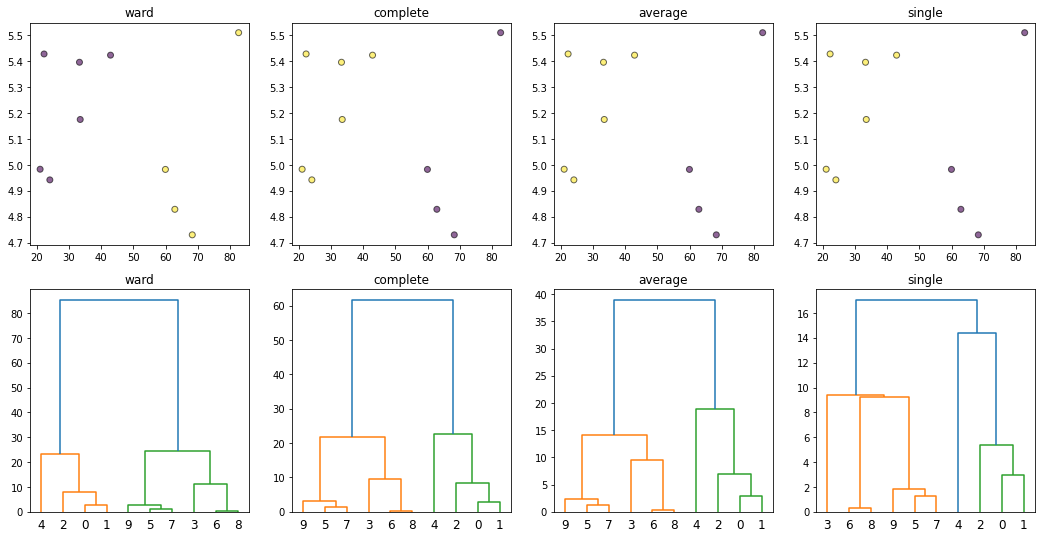

In [155]:

def compare_linkage(X):
    
    plt.figure(figsize=(18, 9))
    linktype=['ward', 'complete', 'average', 'single']

    for i,link in enumerate(linktype):
        model = AgglomerativeClustering(n_clusters=2,linkage=link).fit(X)
        cluster_labels=model.fit_predict(X)   
        #plot scatter 
        plt.subplot(2,4,i+1)        
        plot_scatter(X, cluster_labels)
        plt.title(link)
        # plot dendrogram
        plt.subplot(2,4,i+5)        
        plot_dendrogram(X,link)
        plt.title(link)   

    plt.show()     
    
compare_linkage(X_train)
#四種不同方法

## Apply K-means with re-scaled data
### Feature Re-scale 

In [162]:
X_train

array([[69.71262285,  4.70946843],
       [53.65856425,  4.42611175],
       [64.10156333,  5.5944441 ],
       [57.55795994,  5.24564535],
       [60.40743877,  4.51447009],
       [22.8306861 ,  4.28696801],
       [37.62734122,  4.0644915 ],
       [18.01263256,  4.89140345],
       [34.69515543,  5.22855964],
       [28.18297215,  5.56799851]])

[44.67869366  4.85295608]
[17.62886315  0.51158848]


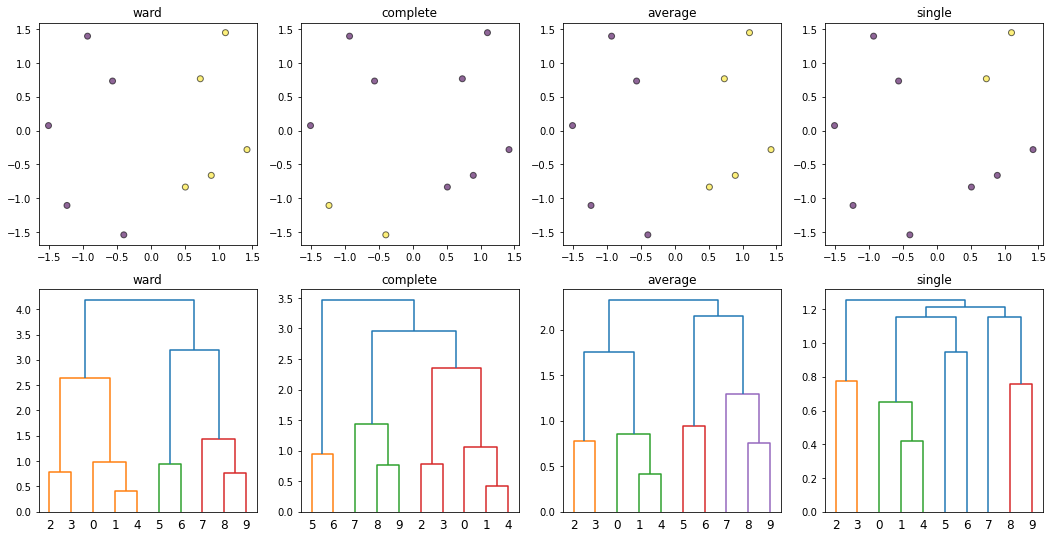

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

#transform: (x-u)/std.
X_train_std = sc.transform(X_train)

np.round(np.mean(X_train_std,axis=0),2)

compare_linkage(X_train_std)

In [167]:
from sklearn.datasets import make_circles
# make a synthetic dataset (circle) #array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05) 

In [168]:
print(X[:10])
print(y[:10])

[[-0.97084503 -0.12673179]
 [-0.01989117 -0.45880462]
 [ 0.95036645  0.21475102]
 [ 0.3868271   0.25685525]
 [-0.53375109 -0.00663921]
 [ 0.34970205 -0.2956982 ]
 [-0.41722927  0.81854348]
 [-0.47625865  0.08139568]
 [ 0.42783229  0.26529816]
 [ 0.36259195 -0.27483444]]
[0 1 0 1 1 1 0 1 1 1]


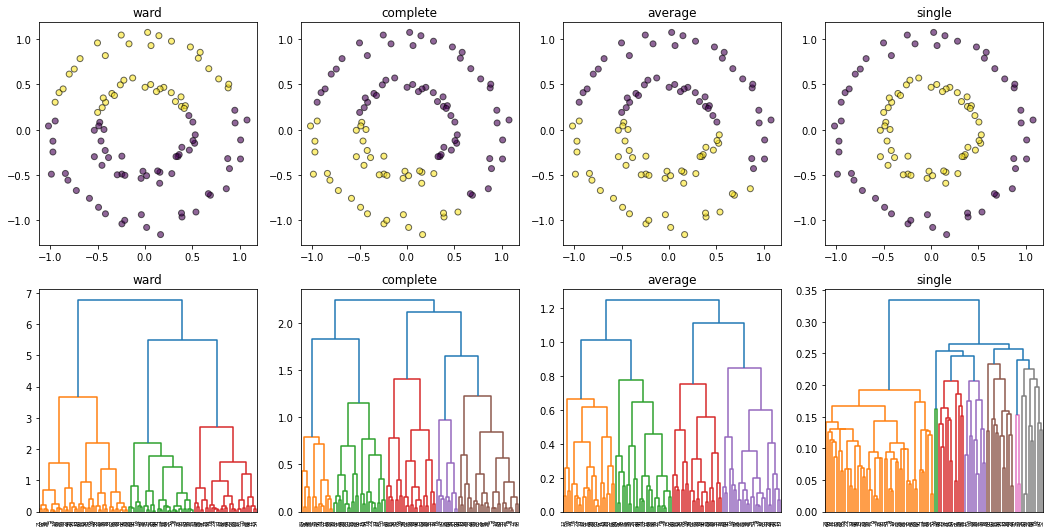

In [166]:
compare_linkage(X)
#在這種情況single會分的比較好